## Fortnite Items from API
I wanted to visualize the amount of differing rarities of Fortnite items from the in-game shop. First I imported the needed libraries, like requests json and pandas.
- Used requests to get a 200 response from the api
- My api call was very simple, just the base url itself, and no extra parameters needed
- Used json.loads and selected the right index value from the converted type in order to make dataframe object
- After converting to dataframe object, I started cleaning the data

## Cleaning the data
I dropped the columns that I didn't need, like image links and tags or video preview urls
- I wanted to clean the data with replacing values so I just converted the entire dataframe to string type
- This would make conditions like str.contain much easier to use
- Replaced the messy rarity brackets with simple one-word categories
- I also replaced timestamps with just the annual year value, since that's what I was looking for

In [23]:
import requests
import json
import pandas


#scraping from website api
r = requests.get("https://fortnite-api.com/v2/cosmetics/br")

items_dict = json.loads(r.text)
finalItems = (items_dict["data"])

#converting to dataframe object and cleaning columns

items = pandas.DataFrame(finalItems)
items = items.drop(columns=["type","series","set","shopHistory","gameplayTags","introduction","images","variants","itemPreviewHeroPath","displayAssetPath","definitionPath","path","customExclusiveCallout","unlockRequirements","exclusiveDescription","builtInEmoteIds","metaTags","showcaseVideo","dynamicPakId","searchTags"])

items = items.astype(str)

#cleaning data with value replacement

items.loc[items['rarity'].str.contains('Legendary'), 'rarity'] = 'Legendary'
items.loc[items['rarity'].str.contains('Epic'), 'rarity'] = 'Epic'
items.loc[items['rarity'].str.contains('Rare'), 'rarity'] = 'Rare'
items.loc[items['rarity'].str.contains('Uncommon'), 'rarity'] = 'Uncommon'
items.loc[items['rarity'].str.contains('Common'), 'rarity'] = 'Common'
items.loc[items['rarity'].str.contains('Common'), 'rarity'] = 'Common'
items.loc[items['rarity'].str.contains('Unattainable'), 'rarity'] = 'Dev Cosmetics'
items.loc[items['rarity'].str.contains('Mythic'), 'rarity'] = 'Mythic'

items.loc[items['added'].str.contains('2022'), 'added'] = '2022'
items.loc[items['added'].str.contains('2023'), 'added'] = '2023'
items.loc[items['added'].str.contains('2021'), 'added'] = '2021'
items.loc[items['added'].str.contains('2020'), 'added'] = '2020'
items.loc[items['added'].str.contains('2019'), 'added'] = '2019'

items.to_csv("FortniteCosmetics.csv")
items.head()

,id,name,description,rarity,added
0,Backpack_AllKnowing,Dark Grasp,Clutching at a grave power.,Rare,2022
1,Backpack_Amour,Folly's Heartcase,Hard-hearted and stylishly sharp.,Rare,2023
2,Backpack_Apprentice,Mind's Eye,The ancient symbol of the Whispered Conclave.,Legendary,2022
3,Backpack_ArcticIceBlue,Gohan's Cape,A gift from Piccolo to inspire him to return t...,Legendary,2023
4,Backpack_ArcticIceTalus,Piccolo's Cape and Turban,Traditional Namekian attire.,Legendary,2023


### Visualized data
- I checked for the amount of different rarities
- I also checked for when items were introduced throughout the years

<AxesSubplot:title={'center':'Item Rarities'}, xlabel='Rarity', ylabel='Amount'>

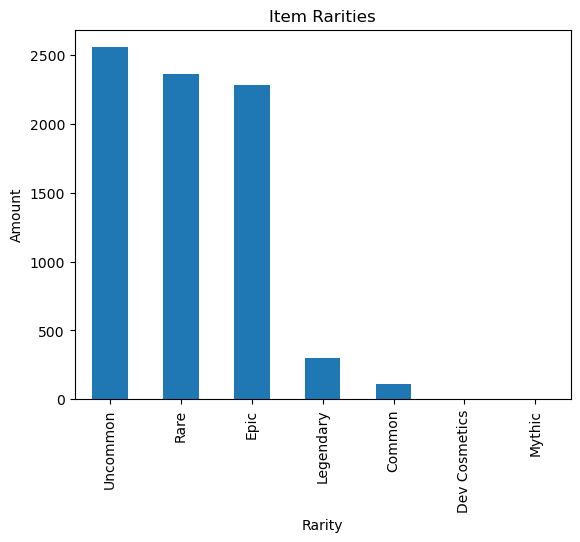

In [36]:
#items["rarity"].value_counts().plot.bar()
y = items["rarity"].value_counts()
y.plot(kind="bar",title="Item Rarities",xlabel = "Rarity",ylabel="Amount")

<AxesSubplot:title={'center':'Annual Item Releases'}, xlabel='Year', ylabel='Amount'>

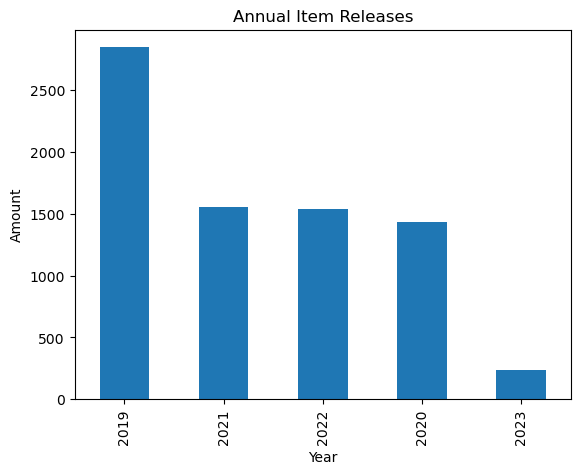

In [35]:
#items["added"].value_counts().plot.bar()
x = items["added"].value_counts()
x.plot(kind="bar",title="Annual Item Releases",xlabel = "Year",ylabel="Amount")

## Conclusions about data analysis

### Viewing the data

When it comes to user-owned items, there are a lot of uncommon items (green) in fortnite, with the Legendary and Common status being the least owned. The mythic and dev-test cosmetics can't be user owned, so it wouldn't be that important when it comes to user interest. The common status is probably lower than Legendary items, only because Epic uses that tag for one umbrella per season, usually the Victory Royale umbrella, which is available to all users but hard to get of course. That's why there's such little Common items, even though the name is Common. 

The years 2020-2022 seem to be very stable, with Epic Games pushing out similar amounts of items throughout those years

### What surprised me

One surprising thing to me was just how little of an amount is in legendary items, and the data seems very skewed. 

__In fact, Epic (purple) items are almost as out there as Uncommon, so it seems like Epic Games the company really likes to push out items and purposely make them Epic rarity to get more profits.__

I didn't expect 2019 to have the most amount of items, but it might be because the API grouped past items all into 2019 when it comes to older items, since Fortnite came out in 2017. 